In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import PIL.Image as image
from sklearn import preprocessing



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


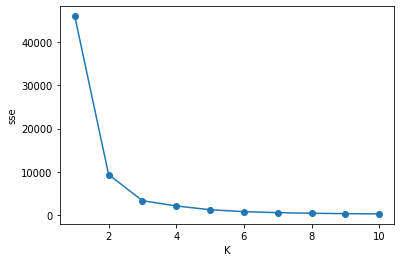

In [4]:
def load_data(image_file):
    img = image.open(image_file)
    data = []
    width, height = img.size
    
    for i in range(width):
        for j in range(height):
            c1, c2, c3 = img.getpixel((i, j))
            data.append([c1, c2, c3])
            
    mm = preprocessing.MinMaxScaler()
    data = mm.fit_transform(data)
    return np.mat(data), width, height

img, width, height = load_data('bird.jpg')

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img)
    sse.append(kmeans.inertia_)
    
x = range(1, 11)

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("K")
plt.ylabel("sse")
plt.plot(x, sse, 'o-')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(img)
label = kmeans.predict(img)
label = label.reshape([width, height])

pic_mark = image.new("L", [width, height])
for i in range(width):
    for j in range(height):
        pic_mark.putpixel((i, j), int(256/(label[i][j]+1)-1))
pic_mark.save("pic.jpg", "JPEG")